# `AA Workshop 11` — Coding Challenge

Complete the tasks below to practice implementing clustering algorithms from `W11_Clustering.ipynb`.

Guidelines:
- Work in order. Run each cell after editing with Shift+Enter.
- Keep answers short; focus on making things work.
- If a step fails, read the error and fix it.

By the end you will have exercised:
- implementing k-means, agglomerative, and fuzzy c-means clustering
- understanding how input data interacts with clustering outcomes
- understanding the impact of the number of clusters on metrics like the silhouette score

**IMPORTANT**: For the task below, you will need an additional package (`drawdata`). I have added this to our `environment.yml` and pushed the updated version, so assuming that you pulled the latest commits, you should be able to update your local `AA_env` simply by running `conda env update --file environment.yml --prune`.

## Task 1 - Clustering Using Synthetic Data

To further help you understand the different clustering algorithms, this task let's you create different toy datasets and compare clustering results.

The tool we use to create toy datasets is `drawdata` (https://pypi.org/project/drawdata/). It provides a very nice, illustrative user interface. Run the following commands:
```
from drawdata import ScatterWidget
widget = ScatterWidget()
widget
```
Afterwards, an interactive widget pops up, which let's you _draw_ data points. When you are done, you can extract the underlying data (`x` and `y` coordinates) using `widget.data_as_pandas`.

Try it out below:

In [11]:
from drawdata import ScatterWidget
widget = ScatterWidget()
widget

In [12]:
test_data = widget.data_as_pandas
test_data.head()

,x,y,color,label,batch
0,59.805305,345.782397,#1f77b4,a,0
1,72.849977,363.210932,#1f77b4,a,0
2,94.950678,347.236781,#1f77b4,a,0
3,79.678296,331.237053,#1f77b4,a,0
4,74.338684,348.494122,#1f77b4,a,0


Your task is to define a function that takes the drawdata-widget and a desired number of clusters `k` as inputs. The function should then:
- extract the x and y data
- scale the data
- generate `k` clusters using k-means, agglomerative, and fuzzy c-means clustering
- compute the mean silhouette scores for each model
- plot the clustering results as colored scatter plots next to each other. 

Use your function to see how the algorithms work for different synthetic datasets. Play around with the shape of the underlying clusters, the number of clusters etc. and evaluate the effect on clustering outcomes and the silhouette scores.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from drawdata import ScatterWidget
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import skfda
from skfda.ml.clustering import FuzzyCMeans
from sklearn.metrics import silhouette_score

In [14]:
# define function
def run_clustering_comparison(widget, k):
    """
    Extracts data from a ScatterWidget, scales it, runs
    k-means, agglomerative clustering, and fuzzy c-means,
    and plots the results side by side.
    """

    # 1. Extract data
    data = widget.data_as_pandas

    if data.shape[0] == 0:
        raise ValueError("No data points drawn.")

    X = np.asarray(data[["x","y"]])

    # 2. Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)

    # 4. Agglomerative clustering
    agg = AgglomerativeClustering(n_clusters=k)
    labels_agg = agg.fit_predict(X_scaled)

    # 5. Fuzzy c-means
    X_f = skfda.FDataGrid(X_scaled)
    fcm = FuzzyCMeans(n_clusters=k, fuzzifier=2, random_state=42)
    labels_fcm = fcm.fit_predict(X_f)
    U = fcm.membership_degree_
    U_max = np.max(U, axis=1) ** 3

    # 6. Compute silhouette scores
    sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
    sil_agg = silhouette_score(X_scaled, labels_agg)
    sil_fcm = silhouette_score(X_scaled, labels_fcm)
    
    # 6. Plot results
    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

    axes[0].scatter(X[:, 0], X[:, 1], c=labels_kmeans, s=30)
    axes[0].set_title(f"k-means\nsilhouette = {sil_kmeans:.2f}", fontweight="bold")

    axes[1].scatter(X[:, 0], X[:, 1], c=labels_agg, s=30)
    axes[1].set_title(f"Agglomerative\nsilhouette = {sil_agg:.2f}", fontweight="bold")

    axes[2].scatter(X[:, 0], X[:, 1], c=labels_fcm, s=30, alpha=U_max)
    axes[2].set_title(f"Fuzzy c-means\nsilhouette = {sil_fcm:.2f}", fontweight="bold")

    for ax in axes:
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")

    plt.tight_layout()
    plt.show()

In [16]:
# draw data
widget = ScatterWidget()
widget

C:\Users\micha\anaconda3\envs\AA_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


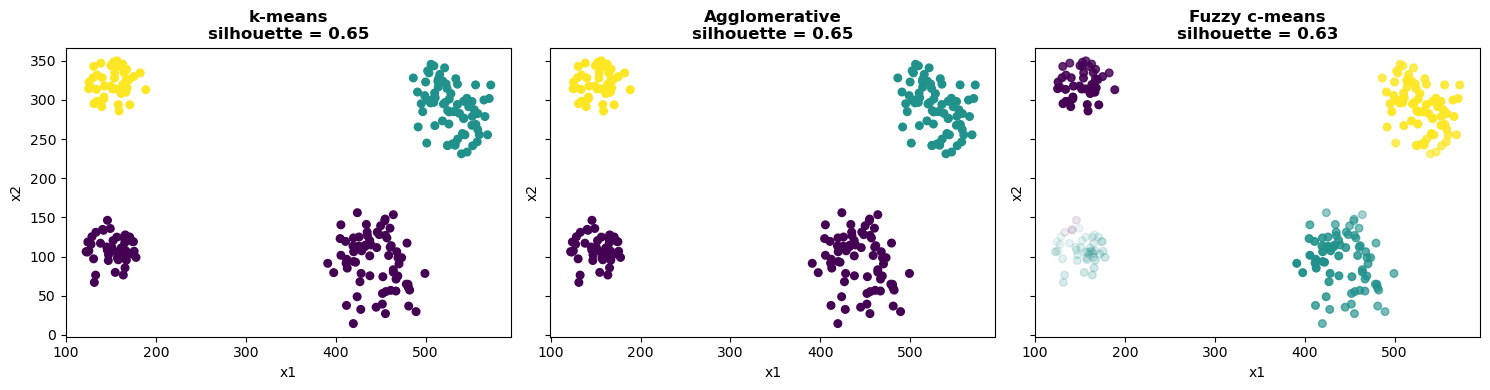

In [17]:
# run clustering analysis
run_clustering_comparison(widget, k=3)